In [2]:
# imports 
from preprocessing.preproccessing_one_hot_encoding import *
from preprocessing.preprocessing_label_encoding import *
from preprocessing.preprocessing import *

from visualization.classification_plots import *
from visualization.general_plots import *

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')


1. One Hot Encoding - All Columns

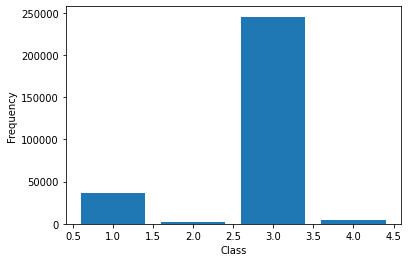

Classification Report for One Hot Encoding - All Columns:
              precision    recall  f1-score   support

         1.0       0.39      0.00      0.01      7199
         2.0       0.00      0.00      0.00       491
         3.0       0.85      1.00      0.92     49095
         4.0       0.00      0.00      0.00       962

    accuracy                           0.85     57747
   macro avg       0.31      0.25      0.23     57747
weighted avg       0.77      0.85      0.78     57747



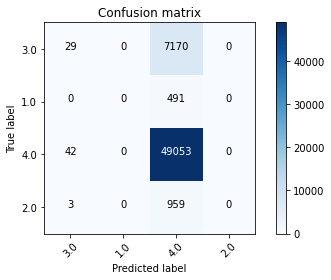

In [3]:
#load data
dataset, target = get_preprocessed_brfss_dataset_one_hot_encoded_all_columns()
plot_class_frequencies(target)
data_train, data_test, target_train, target_test = get_train_test_split(dataset, target)

#replace NaNs with 0s as LinearSVC can't handle missing values
data_train.fillna(0, inplace=True)
data_test.fillna(0, inplace=True)
target_train.fillna(0, inplace=True)
target_test.fillna(0, inplace=True)

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
test_predictions = svm.predict(data_test)

#evaluate
one_hot_all_acc = metrics.accuracy_score(target_test, test_predictions)
one_hot_all_cm = metrics.confusion_matrix(target_test, test_predictions)
one_hot_all_cr = metrics.classification_report(target_test, test_predictions)

print("Classification Report for One Hot Encoding - All Columns:")
print(one_hot_all_cr)
plot_confusion_matrix(one_hot_all_cm, target_test.Diabetes.unique().tolist())



2. One Hot Encoding - All Columns + Undersampling

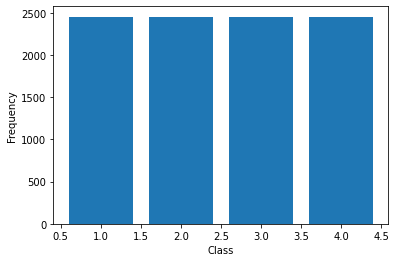

Classification Report for One Hot Encoding - All Columns + Undersampling:
              precision    recall  f1-score   support

         1.0       0.36      0.40      0.38       491
         2.0       0.37      0.44      0.40       491
         3.0       0.34      0.43      0.38       492
         4.0       0.32      0.13      0.18       491

    accuracy                           0.35      1965
   macro avg       0.35      0.35      0.34      1965
weighted avg       0.35      0.35      0.34      1965



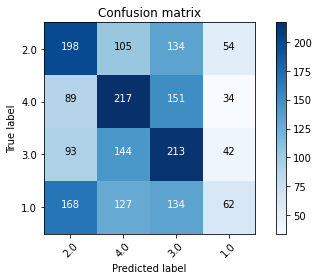

In [4]:
#load data
dataset, target = get_preprocessed_brfss_dataset_one_hot_encoded_all_columns_undersampled()
plot_class_frequencies(target)
data_train, data_test, target_train, target_test = get_train_test_split(dataset, target)

#replace NaNs with 0s as LinearSVC can't handle missing values
data_train.fillna(0, inplace=True)
data_test.fillna(0, inplace=True)
target_train.fillna(0, inplace=True)
target_test.fillna(0, inplace=True)

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
test_predictions = svm.predict(data_test)

#evaluate
one_hot_all_under_acc = metrics.accuracy_score(target_test, test_predictions)
one_hot_all_under_cm = metrics.confusion_matrix(target_test, test_predictions)
one_hot_all_under_cr = metrics.classification_report(target_test, test_predictions)

print("Classification Report for One Hot Encoding - All Columns + Undersampling:")
print(one_hot_all_under_cr)
plot_confusion_matrix(one_hot_all_under_cm, target_test.Diabetes.unique().tolist())

3. Label Encoding

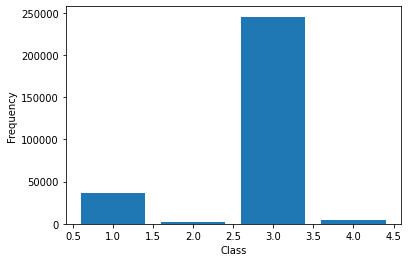

Classification Report for Original Label Encoding:
              precision    recall  f1-score   support

         1.0       0.59      0.07      0.13      7199
         2.0       0.00      0.00      0.00       491
         3.0       0.86      0.99      0.92     49095
         4.0       0.00      0.00      0.00       962

    accuracy                           0.85     57747
   macro avg       0.36      0.27      0.26     57747
weighted avg       0.80      0.85      0.80     57747



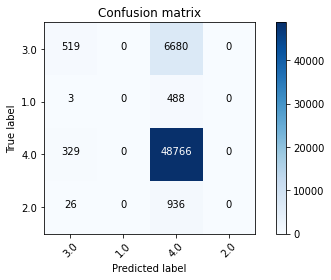

In [5]:
#load data
dataset, target = get_preprocessed_brfss_dataset_label_encoded()
plot_class_frequencies(target)
data_train, data_test, target_train, target_test = get_train_test_split(dataset, target)

#replace NaNs with 0s as LinearSVC can't handle missing values
data_train.fillna(0, inplace=True)
data_test.fillna(0, inplace=True)
target_train.fillna(0, inplace=True)
target_test.fillna(0, inplace=True)

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
test_predictions = svm.predict(data_test)

#evaluate
label_acc = metrics.accuracy_score(target_test, test_predictions)
label_cm = metrics.confusion_matrix(target_test, test_predictions)
label_cr = metrics.classification_report(target_test, test_predictions)

print("Classification Report for Original Label Encoding:")
print(label_cr)
plot_confusion_matrix(label_cm, target_test.Diabetes.unique().tolist())

4. Comparison

In [6]:
print("Accuracy - One Hot Encoding - All Columns:" , one_hot_all_acc)
print("Accuracy - One Hot Encoding - All Columns + Undersampling:" , one_hot_all_under_acc)
print("Accuracy - Label Encoding:" , label_acc)

Accuracy - One Hot Encoding - All Columns: 0.8499489150951565
Accuracy - One Hot Encoding - All Columns + Undersampling: 0.3511450381679389
Accuracy - Label Encoding: 0.8534642492250679


The comparison shows that, of the three selected approaches, the SVM classifier performs best 
with the dataset using original label encodings.